<a href="https://colab.research.google.com/github/aypy01/tensorflow/blob/main/module-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Module-4

## Reinforcement Learning (RL) – Beginner-Friendly Intro

In Reinforcement Learning, we **don't start with a dataset** like in supervised learning. Instead, the data and learning happen *side by side* during interaction with the environment.

###Core Concept

- There is an **Environment** that contains many **States**.
- An **Agent** starts at a **random initial state** and begins to explore.
- The agent performs **Actions** in the environment.
- For each action, the agent receives a **Reward**:
  -  Positive reward for good actions
  -  Negative reward for bad actions

### Exploration vs. Exploitation

A key difference in RL is that:
> Even after finding a good path to the goal, the agent **should not always repeat that same path**.

- The agent must also **explore suboptimal paths**, even if they're risky or less rewarding in the short term.
- This exploration helps find a **truly optimal policy** in the long run.




### Q-Learning

####How it works?

Learning the Q-table.

In the start, the Q-table is initialized with all zeros. The agent then starts taking random actions to explore the environment. Based on the rewards it receives, it updates the values in the Q-table. These rewards help it learn which actions lead to better outcomes.

#### Action selection:

There are two ways to select an action:

1. **Pick the best action** based on what has been learned (from the Q-table).
2. **Randomly pick an action**, even if it might be poor.

Even though random actions may give bad rewards at times, they help the agent explore new paths. This is important because the agent might discover a better, more optimal path it wouldn't have otherwise tried.

At first, the agent takes mostly random actions, but over time, it starts picking better actions learned from experience.

The best strategy is to **combine both approaches** — some randomness and some learned choices — so the agent doesn’t get stuck in a local optimum.

#### Q-table update formula:
 Q[state,action]=Q[state,action]+α(reward+γ⋅ maxQ[new_state,:]−Q[state,action])

#### Parameters:

- **alpha (α)** = Learning rate  
  Controls how much the Q-value should update.  
  A high alpha means quicker updates (more change).  
  A low alpha means slower, more stable updates.

- **gamma (γ)** = Discount rate  
  Determines how much future rewards matter.  
  A high gamma values future rewards more.  
  A low gamma focuses on immediate rewards.

#### Summary:

- The Q-table starts with all zeros.
- The agent explores the environment using random actions.
- It learns from rewards and updates the Q-table.
- It gradually shifts from exploration (random) to exploitation (choosing best known action).
- The balance of exploration and exploitation ensures it doesn't get stuck in a local maximum.



##Q-Learning using OpenAI gym

### Introduction to OpenAI Gym

OpenAI Gym is a toolkit for developing and comparing reinforcement learning (RL) algorithms. It provides a wide variety of environments, such as classic control problems, Atari games, robotic simulations, and more. These environments can be used to train agents and evaluate RL algorithms in a standardized way.

## Key Features of OpenAI Gym:
- **Standardized API**: Gym provides a consistent interface for all environments, making it easy to swap environments and focus on the learning algorithms.
- **Various Environments**: Gym offers a wide range of environments from simple problems like cart-pole balancing to complex simulations involving robotics and Atari games.
- **Integration with Popular Libraries**: Gym integrates well with popular libraries like TensorFlow, PyTorch, and stable-baselines for developing RL agents.




In [ ]:
#Installing and importing gym
!pip install gymnasium

import gymnasium as gym

##Creating Enviroment
In this section, we create and interact with the **FrozenLake-v1** environment, a simple grid world used in reinforcement learning. The goal is to navigate from the start to the goal while avoiding holes. We will also display some key information about the environment, such as the number of states and available actions.


In [ ]:
# Create the environment
env = gym.make("FrozenLake-v1", is_slippery=True)  # can also pass render_mode
#To see what this enviromen have visually we print them
#To see number of stes this enviroment has
print("States:",env.observation_space.n)##.n??
#To see Actions our agent have
print("Actions:",env.action_space.n)

States: 16
Actions: 4


##Reset Enviroment:
this gives the initial point to agent to start from.
As frozen lake is a case where the starting should be fixed not randomized

In [ ]:
# Reset environment (returns a tuple )
state,info = env.reset() # The env.reset() method returns the initial state. The returned value is assigned to the state variable.

# Take a random action
action = env.action_space.sample()
#Modified line to accomodate the 4 values returned by env.step()
new_state, reward, terminated, truncated, info = env.step(action)

#env.render() #This wont work on collab , but terminal of any ide

FrozenLake have: 16 states,4 action(left,right,up,down),4 Blockages (frozen,hole,start and Goal)

##Making the Q-Table
In Q-learning, the **Q-table** stores Q-values for each state-action pair. Initially, it is often set to **zero** to represent that the agent has no prior knowledge about the environment.

In [ ]:
import numpy as np
import time

#Create the Enviroment
env=gym.make('FrozenLake-v1',is_slippery=True) # is_slippery = makes the agent to even a slippin on lake parameter

state=env.observation_space.n
action=env.action_space.n

#MAking the whole states in zeros according to architecture
Q=np.zeros((state,action))
Q


array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

##Q-Learning

In Q-learning, the **Q-table** is used to store the **Q-values** for each state-action pair. Initially, it is set to zeros, indicating the agent has no prior knowledge of the environment. This setup encourages the agent to explore different actions and learn from rewards through interaction with the environment.

### Key Points:
- **Environment**: We create the `FrozenLake-v1` environment from **OpenAI Gym**, where the agent learns to navigate a frozen lake.
- **States and Actions**: The number of states and actions in the environment are obtained using `observation_space.n` and `action_space.n`, respectively.
- **Q-table**: The Q-table is initialized with zeros, with dimensions corresponding to the number of states and actions in the environment. This serves as a starting point for the agent to learn optimal actions over time.

The Q-table evolves over time as the agent explores and updates the values based on rewards, gradually shifting from random exploration to choosing the best-known actions.









```
Remember to run below 5 times ateleast before checking the model accuracy

```



In [ ]:
#Now setting the goals and blockage info and intructions to agent

episode=20000
max_step=250 #Intructing to reach to goal in up step 250 otherwise it will terminate thinking its in some Loop Phase

#Changing the alpha gamma and epsilon gives the optimized aoutput
alpha=0.3 #Learning Rate
gamma=0.95 #Discount Rate

#Picking the Initial Action:
#as we know we have to take a balancesd approch where there some random action is start and after some time chhosing the correct actions
#For that we will go foe epsilon Approch

epsilon=0.90



#Putting Everything in formula

#Q[state,action]=Q[state,action]+alpha*(reward+gamma*np.max(Q[new_state,:])-Q[state,action])

rewards=[]#making the empty list whic will get the apenned data to form our Q-Table
for e in range(episode): #Making the row
  # In newer versions of gymnasium, env.reset() returns a tuple (observation, info)
  state,info = env.reset()
  for s in range(max_step): #Making the column

    #Conditions
    if np.random.uniform(0,1)<epsilon:
      action=env.action_space.sample() #Taking a random action

    else:
      action=np.argmax(Q[state,:]) #Taking the Max value rewar of state

    next_state,reward,terminated, truncated,info = env.step(action)

    Q[state,action]=Q[state,action]+alpha*(reward+gamma*np.max(Q[next_state,:])-Q[state,action])

    state=next_state

    if terminated or truncated:
      rewards.append(reward)
      epsilon-=0.005
      break #The goal is reached

print(Q)
print(f'Average Rewards= {sum(rewards)/len(rewards)}')

[[0.18007752 0.04633349 0.04673586 0.03798881]
 [0.03625451 0.03423163 0.03627723 0.20402189]
 [0.159014   0.02516856 0.02781999 0.02624387]
 [0.0070307  0.         0.         0.        ]
 [0.23630248 0.03878814 0.02040211 0.04789095]
 [0.         0.         0.         0.        ]
 [0.18898546 0.         0.00322245 0.        ]
 [0.         0.         0.         0.        ]
 [0.04082057 0.0217675  0.06772006 0.28748422]
 [0.0278817  0.31996381 0.06782079 0.05313024]
 [0.52309067 0.05985    0.         0.00694474]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.03154298 0.00848847 0.52257873 0.        ]
 [0.16066844 0.88224269 0.0855     0.22662815]
 [0.         0.         0.         0.        ]]
Average Rewards= 0.72285


##Matplotlib

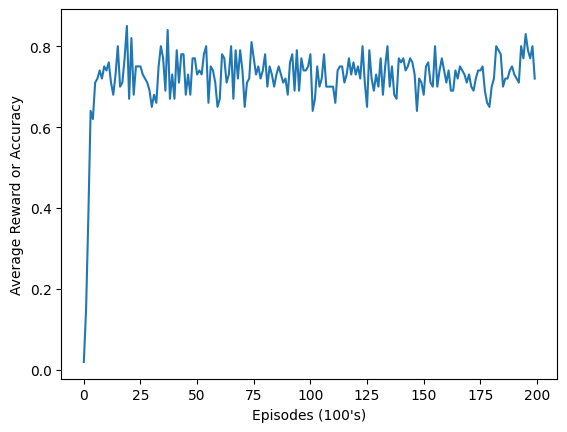

In [ ]:
#Visualizing how drastically agent move changes to optomized one

import matplotlib.pyplot as plt


def get_avg(values):
  return sum(values)/len(values)

avg_rewards=[]

for i in range (0,len(rewards),100):
  avg_rewards.append(get_avg(rewards[i:i+100]))

plt.plot(avg_rewards)
plt.ylabel('Average Reward or Accuracy')
plt.xlabel("Episodes (100\'s)")
plt.show()

###Summary

1. The Q-table starts with all zeros:

    Typically, the Q-table (which stores the Q-values for each state-action pair) is initialized to zero. This is because initially, the agent has no knowledge of which actions are good or bad, so all state-action values are set to zero.

2. The agent explores the environment using random actions:

    Early in the learning process, the agent explores its environment by taking random actions. This is done to gather experiences and learn about the environment and the rewards associated with different actions.

3. It learns from rewards and updates the Q-table:

    After each action, the agent receives a reward (or penalty) and updates the Q-value for the state-action pair using the Q-learning update formula. This process helps the agent learn the expected long-term rewards for each state-action pair.

4. It gradually shifts from exploration (random) to exploitation (choosing the best-known action):

    As the agent learns more about the environment, it starts to shift its behavior towards exploitation, which means choosing the action that is believed to give the highest reward (based on the current Q-values).
    Initially, the agent explores a lot, but over time, it takes fewer random actions and focuses more on exploiting the knowledge it has gained.

5. The balance of exploration and exploitation ensures it doesn't get stuck in a local maximum:

    The balance between exploration (trying new actions) and exploitation (choosing the best-known action) is crucial to ensure that the agent doesn't get stuck in suboptimal strategies (local maxima).

    Techniques like epsilon-greedy (where the agent chooses the best-known action most of the time but occasionally picks a random action with probability
    𝜖
    ϵ) help maintain this balance, enabling the agent to discover better strategies over time.

    This is a concise but accurate overview of the core principles of Q-learning!


1. **Environment Setup**  
   - Used `FrozenLake-v1` from Gymnasium with `is_slippery=True`.  
   - Initialized Q-table with zeros.  

2. **Hyperparameters**  
   - Learning rate (α)  
   - Discount factor (γ)  
   - Exploration rate (ε) with decay  
   - Number of episodes  
   - Maximum steps per episode  

3. **Episode Loop**  
   - Reset environment at the start.  
   - At each step:  
     - **Action selection** via epsilon-greedy:  
       - Random action with probability ε  
       - Greedy action (`argmax(Q[state])`) otherwise  
     - Execute action → observe new state, reward, and termination flag  

4. **Q-Table Update (Bellman Equation)**  
   - Update rule:  
     \[
     Q[s,a] \leftarrow Q[s,a] + \alpha \big( r + \gamma \max_a Q[s',a] - Q[s,a] \big)
     \]  
   - Captures immediate reward `r` + discounted future rewards.  

5. **Exploration vs Exploitation**  
   - After each episode, ε decays gradually → more exploitation over time.  

6. **Evaluation**  
   - After training, tested the policy by averaging rewards across multiple episodes.  
   - The agent achieved ~72% success in navigating FrozenLake.  


---
If you're looking to dive deeper into  [Gymnasium](https://gymnasium.farama.org/tutorials/gymnasium_basics/) and its Reinforcement Learning tools, check out the official  [Gymnasium](https://gymnasium.farama.org/tutorials/gymnasium_basics/) tutorials

##Note

Knowledge grows when it’s shared, not hidden.
These TensorFlow notes are my way of keeping the path open for anyone who’s curious enough to learn. I’m not claiming to be an expert just someone who struggled, experimented, and wrote things down so the next person doesn’t have to start from zero.

This is only a beginning. From preprocessing data to building CNNs and trying out reinforcement learning, each step showed me how much more there is to explore. If you’ve made it this far, don’t stopturn these foundations into projects, mistakes, and eventually, mastery.

  -- Thank You

---
## Navigation

###  Explore More Projects
[![Project: Sentiment Analysis](https://img.shields.io/badge/Project-Sentiment_Analysis-e6770b?style=for-the-badge&logo=github&logoColor=00FF80&labelColor=765898)](https://github.com/aypy01/tensorflow/blob/main/sentiments.ipynb)

[![Project:Fuel](https://img.shields.io/badge/Project-Fuel_efficiency-e6770b?style=for-the-badge&logo=github&logoColor=00FF80&labelColor=765898)](https://github.com/aypy01/tensorflow/blob/main/fuel_efficiency.ipynb)

[![Project:Fashion-MNIST](https://img.shields.io/badge/Project-Fashion_MNIST-e6770b?style=for-the-badge&logo=github&logoColor=00FF80&labelColor=765898)](https://github.com/aypy01/tensorflow/blob/main/fashion-mnist-image-classifier.pyb)

---

## Author
 <p align="left">
  Created and maintained by &nbsp;
  <a href="https://github.com/aypy01" target="_blank">
  <img src="https://img.shields.io/badge/Aaditya_Yadav-aypy01-e6770b?style=flat-square&logo=github&logoColor=00FF80&labelColor=765898" alt="GitHub Badge"/>
</a>

</p>

<p>
<img src="https://readme-typing-svg.demolab.com?font=Fira+Code&duration=3000&pause=500&color=00FF80&background=765898&center=false&vCenter=false&width=440&lines=Break+Things+First%2C+Understand+Later;Built+to+Debug%2C+Not+Repeat;Learning+What+Actually+Sticks;Code.+Observe.+Refine." alt="Typing SVG" />
</p>


---
## License

This project is licensed under the [![License: MIT](https://img.shields.io/badge/License-MIT-yellow.svg)](https://opensource.org/licenses/MIT).

---